In [1]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.IMAGENETTE)

In [3]:
path.ls()

(#3) [Path('/root/.fastai/data/imagenette2/val'),Path('/root/.fastai/data/imagenette2/train'),Path('/root/.fastai/data/imagenette2/noisy_imagenette.csv')]

In [4]:
Path.BASE_PATH = path
path.ls()

(#3) [Path('val'),Path('train'),Path('noisy_imagenette.csv')]

In [5]:
datablock_normalized = DataBlock((ImageBlock,CategoryBlock),
                                get_items = get_image_files,
                                get_y = parent_label,
                                item_tfms = Resize(460),
                                batch_tfms = [*aug_transforms(size=224,min_scale=0.8),
                                              Normalize.from_stats(*imagenet_stats)]
                                )

In [6]:
dl_normalized = datablock_normalized.dataloaders(path/'train')

In [9]:
model_normalized = xresnet50(n_out = dl_normalized.c)
learn_normalized = Learner(dl_normalized,model_normalized,
                           loss_func= CrossEntropyLossFlat(),metrics = accuracy)

In [11]:
#Count the number of elements in train dataset in total
count=0
for i in ((path/'train').ls()):
    for j in Path(f'{i}').ls():
        count+=1
        
print(count)

9469


In [12]:
len(dl_normalized.train.items), len(dl_normalized.valid.items)

(7576, 1893)

In [32]:
model_norm = xresnet50(n_out = dl_normalized.c)

- Validation list originally has 3925 images
- Validation list contains 3925*5 images after the image transformation run, because we create 4 transforms per image

In [23]:
re.findall(r'(.+)',test_imglist[1].name)

['n03028079_3441.JPEG']

1. Loop through images
2. Open 1 image
3. Exrtact its filename
4. Perform transforms on it - one by one
5. After each transform, add an _ followed by a number so an images and its transforms can be associated with the same filename
6. Perform all transforms for one image. At the end, you should have 4 transforms with them sharing the same parent file's name followed by an underscore at the end

### This below code cell is for functions to create image transforms for each image

In [ ]:
def top_left(image,size=224):
    top = 0
    left = 0
    right = size
    bottom = size
    print(left,top,right,bottom)
    return image.crop((left,top,right,bottom))


def top_right(image,size=224):
    top = 0
    left = width - size
    right = width
    bottom = size
    print(left,top,right,bottom)
    return image.crop((left,top,right,bottom))

def bottom_left(image,size=224):
    top = height - size
    left = 0
    right = size
    bottom = height
    print(left,top,right,bottom)
    return image.crop((left,top,right,bottom))

def bottom_right(image,size=224):
    top = height - size
    left = width - size
    right = width
    bottom = height
    print(left,top,right,bottom)
    return image.crop((left,top,right,bottom))

In [35]:
re.findall(r"(.+).JPEG",test_imglist[1].name)[0] + "_1.JPEG"

'n03028079_3441_1.JPEG'

### Only run the below code cell to create image transforms for each validation image and then save them all into their respective folders in the val directory

In [ ]:
test_imglist = []
image_transforms = [top_left,top_right,bottom_left,bottom_right]
for folder in (path/'val').ls():
    for item in folder.ls():
        test_imglist.append(item)
        count = 0
        for transform in image_transforms:
            count +=1
            width,height = Image.open(item).size
            transformed_item = transform(Image.open(item))
            test_imglist.append(transformed_item)
            transformed_item.save(f"{folder}/{item.stem}_{count}.JPEG")

In [ ]:
dog = Image.open('dog.jpeg')


In [138]:
(path/'val').ls()[1].ls().sorted

<bound method L.sorted of [Path('val/n03888257/n03888257_5812_3.JPEG'), Path('val/n03888257/n03888257_34031_2.JPEG'), Path('val/n03888257/n03888257_121_3.JPEG'), Path('val/n03888257/ILSVRC2012_val_00001440_1.JPEG'), Path('val/n03888257/n03888257_59412_2.JPEG'), Path('val/n03888257/n03888257_7061_3.JPEG'), Path('val/n03888257/n03888257_13410_1.JPEG'), Path('val/n03888257/n03888257_11901_2.JPEG'), Path('val/n03888257/n03888257_37950_4.JPEG'), Path('val/n03888257/n03888257_36971_3.JPEG'), Path('val/n03888257/n03888257_11931_1.JPEG'), Path('val/n03888257/n03888257_22330_1.JPEG'), Path('val/n03888257/n03888257_38102_2.JPEG'), Path('val/n03888257/n03888257_29910_2.JPEG'), Path('val/n03888257/n03888257_5692.JPEG'), Path('val/n03888257/n03888257_3720_2.JPEG'), Path('val/n03888257/n03888257_12842_1.JPEG'), Path('val/n03888257/n03888257_76721_2.JPEG'), Path('val/n03888257/n03888257_34280.JPEG'), Path('val/n03888257/n03888257_15382_3.JPEG'), Path('val/n03888257/ILSVRC2012_val_00002990_4.JPEG'), P

In [19]:
for i in test_imglist[:10]:
    print(i)

/root/.fastai/data/imagenette2/val/n03028079/ILSVRC2012_val_00016832.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_3441.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_46722.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_26272.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_24602.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_7752.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_24072.JPEG
/root/.fastai/data/imagenette2/val/n03028079/ILSVRC2012_val_00010770.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_15961.JPEG
/root/.fastai/data/imagenette2/val/n03028079/n03028079_14992.JPEG


In [103]:
test_imglist[0]
re.findall(r'(.+)_\d+.JPEG',test_imglist[0].name)

['ILSVRC2012_val']

In [33]:
learn_normalized = Learner(dl_normalized,model_norm,
                           loss_func= CrossEntropyLossFlat(),metrics = accuracy)
learn_normalized.fit_one_cycle(2,3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.726101,1.948699,0.429477,01:30
1,1.236807,1.068643,0.662441,01:29


In [159]:
#Class for creating an image with functions of the four image transforms

# class CreateImage:
    
#     def __init__(self,image,size):
#         self.image = image
#         self.size = size
#         self.width,self.height = image.size

#     def top_left(self):
#         top = 0
#         left = 0
#         right = self.size
#         bottom = self.size
#         return self.image.crop((left,top,right,bottom))

#     def top_right(self):
#         top = 0
#         left = self.width - self.size
#         right = self.width
#         bottom = self.size
#         return self.image.crop((left,top,right,bottom))

#     def bottom_left(self):
#         top = self.height - self.size
#         left = 0
#         right = self.size
#         bottom = self.height
#         return self.image.crop((left,top,right,bottom))

#     def bottom_right(self):
#         top = self.height - self.size
#         left = self.width - self.size
#         right = self.width
#         bottom = self.height
#         return self.image.crop((left,top,right,bottom))
    

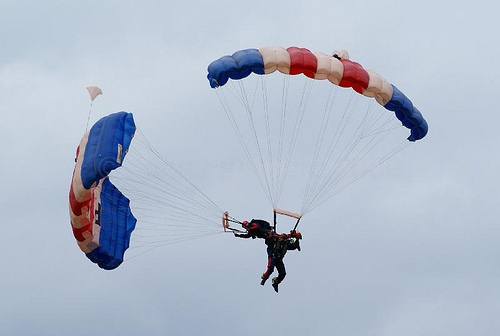

In [7]:
Image.open(path.ls()[1].ls()[1].ls()[1])

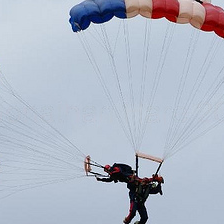

In [14]:
Image.open(path.ls()[1].ls()[1].ls()[1]).crop((138,56,138+224,56+224))

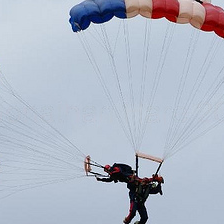

In [13]:
Image.open(path.ls()[1].ls()[1].ls()[1]).crop_pad(224)

In [8]:
Image.open(path.ls()[1].ls()[1].ls()[1]).size

(500, 336)

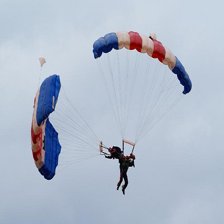

In [10]:
Image.open(path.ls()[1].ls()[1].ls()[1]).resize((224,224))

In [96]:
width,height = sample_img.size
width,height

(500, 336)

151 276 375 500


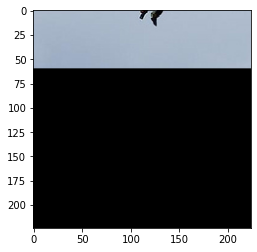

In [119]:
plt.imshow(bottom_right(sample_image))

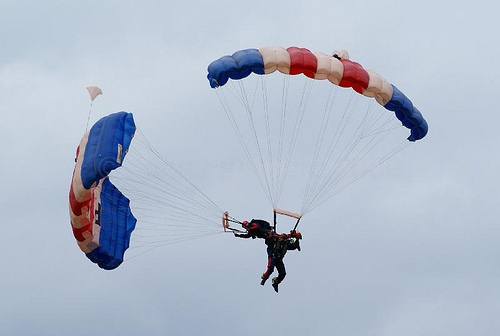

In [118]:
sample_image = (Image.open(path.ls()[1].ls()[1].ls()[1]))
sample_image

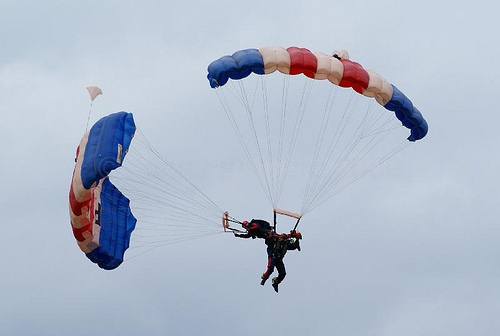

In [115]:
for i in (path/'val').ls():
    for j in i.ls():
        print(f"The filename without extension is {j.stem} and folder name is {i}")
        

The filename without extension is ILSVRC2012_val_00016832 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_3441 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_46722 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_26272 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_24602 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_7752 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_24072 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is ILSVRC2012_val_00010770 and folder name is /root/.fastai/data/imagenette2/val/n03028079
The filename without extension is n03028079_15961 and folder name is /root

In [125]:
len((path/'val').ls())

10

In [132]:
itemcount = 0
for i in (path/'val').ls():
    print(f"Number of items is {len(i.ls())}")
    itemcount += len(i.ls())
    
print(itemcount)

Number of items is 2045
Number of items is 1950
Number of items is 1975
Number of items is 2095
Number of items is 1930
Number of items is 1995
Number of items is 1785
Number of items is 1945
Number of items is 1935
Number of items is 1970
19625


<strong>Todo:</strong> For all filenames which contain 'X' in filename, create a mean of all these filenames' arrays, then 

In [ ]:
for folder in (path/'val').ls():
    for item in folder.ls():
        

In [101]:
image_transforms = [top_left,top_right,bottom_left,bottom_right]
image_list = []
def return_transforms(sample_image):
    for transform in image_transforms:
        width,height = sample_image.size
        image_list.append(transform(sample_image))

In [105]:
preds,_,probs = learn_normalized.predict((path/'val').ls()[1].ls()[1])dd

<strong>Akshay</strong>:


1. Do a zip of a filename and its prediction.
2. For each filename of the same type, capture the mean over all their predictions.
3. Do this for all the different filenames in our testset.
4. Change the existing filenames by adding a _0 at the end for all of them.
5. For the new transformed images that you add to the test set, update the last number after the underscore
by incrementing it. This way, you should have _0 to _4 for each image.
6. Write logic that goes through each of these images and takes their preds and finally takes an average of them.

In [107]:
preds,targets = learn_normalized.get_preds()
preds, targets

(TensorBase([[9.8712e-05, 1.1101e-04, 8.2660e-01,  ..., 4.3353e-03, 1.8662e-03, 7.5092e-04],
             [9.1577e-02, 4.5135e-02, 3.3935e-01,  ..., 3.0593e-02, 2.1194e-02, 2.8608e-02],
             [8.4485e-05, 1.6341e-05, 2.7127e-03,  ..., 8.4892e-04, 3.2408e-05, 1.5904e-04],
             ...,
             [7.3467e-01, 6.0296e-02, 2.0462e-04,  ..., 3.7724e-03, 3.2406e-02, 1.2290e-02],
             [7.4771e-02, 8.4943e-01, 3.3984e-05,  ..., 1.8269e-04, 5.9769e-02, 2.5546e-04],
             [4.5197e-05, 2.3799e-05, 5.5081e-01,  ..., 1.4403e-02, 1.3753e-04, 5.7844e-04]]),
 tensor([2, 2, 5,  ..., 3, 1, 6]))

In [131]:
re.findall(r'.+_\d+_(\d+)',namees[2])

['198']

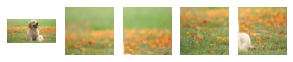

In [117]:
img_list = [dog,k.top_left(),k.top_right(),k.bottom_left(),k.bottom_right()]
_,axs = plt.subplots(1,5,figsize=(5,5))
for img, ax in zip(img_list,axs):
    show_image(img,ax)
